In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from tqdm.auto import tqdm
import tensorflow as tf
import shutil

In [ ]:
!mkdir -p /root/.kaggle

In [ ]:
!mv /content/kaggle.json /root/.kaggle

mv: cannot stat '/content/kaggle.json': No such file or directory


In [ ]:
import kaggle

In [ ]:
!unzip -q /content/drive/MyDrive/train.zip

In [ ]:
len(os.listdir('/content/train'))

25000

In [ ]:
!mkdir /content/images
!mkdir /content/images/cats
!mkdir /content/images/dogs

mkdir: cannot create directory ‘/content/images’: File exists
mkdir: cannot create directory ‘/content/images/cats’: File exists
mkdir: cannot create directory ‘/content/images/dogs’: File exists


In [ ]:
source = '/content/train'
cat_dir = '/content/images/cats'
dog_dir = '/content/images/dogs'

In [ ]:
for file in os.listdir(source):
  if 'cat.' in file:
    shutil.copy(os.path.join(source,file),cat_dir)
  elif 'dog.' in file:
    shutil.copy(os.path.join(source,file),dog_dir)

In [ ]:
len(os.listdir(cat_dir)), len(os.listdir(dog_dir))

(12500, 12500)

In [ ]:
!rm -rf train

In [ ]:
!mkdir test

In [ ]:
kitty = np.random.choice(os.listdir(cat_dir),500,replace = False)
doggy = np.random.choice(os.listdir(dog_dir),500,replace = False)

In [ ]:
for i in kitty:
  shutil.move(os.path.join(cat_dir,i),'/content/test')
for i in doggy:
  shutil.move(os.path.join(dog_dir,i),'/content/test')

In [ ]:
len(os.listdir(cat_dir)), len(os.listdir(dog_dir))

(12000, 12000)

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                      rotation_range = 30,
                                                      width_shift_range=0.35,
                                                      height_shift_range=0.35,
                                                      horizontal_flip=True,
                                                      vertical_flip=True,
                                                      validation_split=0.1)

In [ ]:
!mkdir Aug

In [ ]:
dog = os.path.join(dog_dir,'dog.11296.jpg')
img = cv2.imread(dog)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img1 = img.reshape((1,)+img.shape)
img1.shape

(1, 363, 429, 3)

In [ ]:
i = 0
for j in idg.flow(img1,batch_size = 1,save_to_dir='Aug'):
  i+=1
  if i>8:
    break

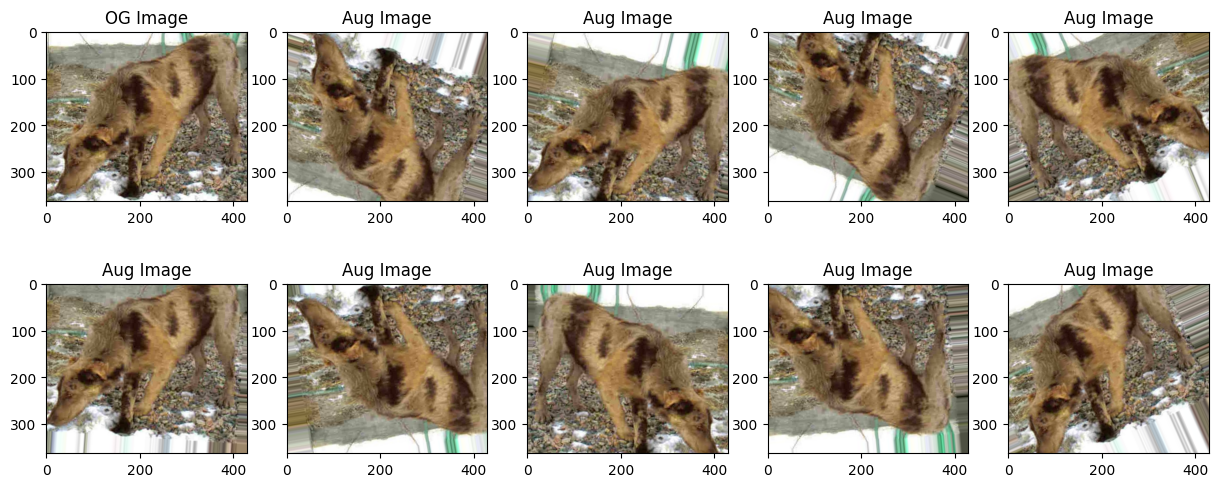

In [ ]:
i = cv2.imread(os.path.join(dog_dir,dog))
i = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
plt.figure(figsize = (15,6))
plt.subplot(2,5,1)
plt.imshow(i)
plt.title('OG Image')

for idx,i in enumerate(os.listdir('/content/Aug')):
  plt.subplot(2,5,1+idx+1)
  img = cv2.imread('/content/Aug/' + i)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.title('Aug Image')

In [ ]:
bs = 128

In [ ]:
train_idg = idg.flow_from_directory('images',target_size=(150,150),batch_size=bs,subset = 'training')

Found 21600 images belonging to 2 classes.


In [ ]:
val_idg = idg.flow_from_directory('images',target_size=(150,150),batch_size=bs,subset = 'validation')

Found 2400 images belonging to 2 classes.


In [ ]:
#del model

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Input((150,150,3),name = 'InputLayer'))
model.add(tf.keras.layers.Flatten(name = 'Flatten'))
model.add(tf.keras.layers.Dense(128,activation='relu',name = 'Hiddenlayer1'))
model.add(tf.keras.layers.Dense(32,activation='relu',name = 'Hiddenlayer2'))
model.add(tf.keras.layers.Dense(2,activation ='softmax',name = 'Output'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 67500)             0         
                                                                 
 Hiddenlayer1 (Dense)        (None, 128)               8640128   
                                                                 
 Hiddenlayer2 (Dense)        (None, 32)                4128      
                                                                 
 Output (Dense)              (None, 2)                 66        
                                                                 
Total params: 8644322 (32.98 MB)
Trainable params: 8644322 (32.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


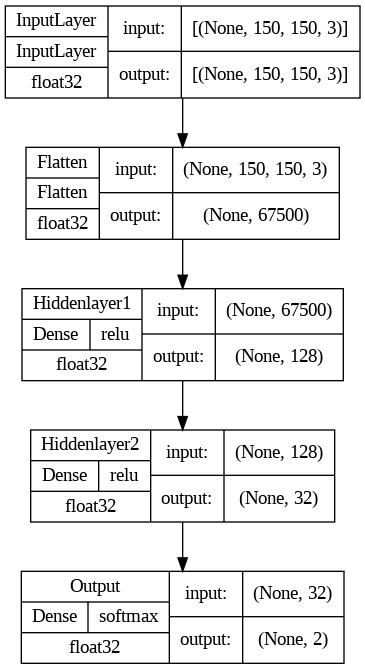

In [ ]:
tf.keras.utils.plot_model(model,show_shapes = True,show_dtype=True,show_layer_activations=True,show_layer_names=True)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = 'accuracy')

In [ ]:
model.fit(train_idg,batch_size=bs,epochs = 10, validation_data=val_idg)

Epoch 1/10
169/169 [==============================] - 127s 747ms/step - loss: 0.7506 - accuracy: 0.5171 - val_loss: 0.6881 - val_accuracy: 0.5288
Epoch 2/10
169/169 [==============================] - 125s 742ms/step - loss: 0.6883 - accuracy: 0.5467 - val_loss: 0.6791 - val_accuracy: 0.5763
Epoch 3/10
169/169 [==============================] - 135s 798ms/step - loss: 0.6830 - accuracy: 0.5638 - val_loss: 0.6771 - val_accuracy: 0.5642
Epoch 4/10
169/169 [==============================] - 135s 802ms/step - loss: 0.6800 - accuracy: 0.5673 - val_loss: 0.6765 - val_accuracy: 0.5638
Epoch 5/10
169/169 [==============================] - 125s 740ms/step - loss: 0.6772 - accuracy: 0.5691 - val_loss: 0.6808 - val_accuracy: 0.5671
Epoch 6/10
169/169 [==============================] - 135s 799ms/step - loss: 0.6773 - accuracy: 0.5735 - val_loss: 0.6732 - val_accuracy: 0.5775
Epoch 7/10
169/169 [==============================] - 125s 741ms/step - loss: 0.6748 - accuracy: 0.5744 - val_loss: 0.6718 -

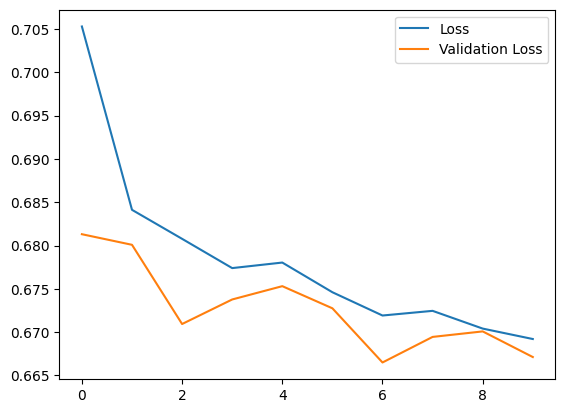

In [ ]:
plt.plot(model.history.history['loss'],label = 'Loss')
plt.plot(model.history.history['val_loss'],label = 'Validation Loss')
plt.legend()
plt.show()

In [ ]:
def image_pred(test):
  test_image = cv2.imread(test)
  test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
  test_image = cv2.resize(test_image,(150,150))
  plt.imshow(test_image)
  test_image = np.expand_dims(test_image,axis = 0)
  t = model.predict(test_image)
  t = pd.DataFrame(t)
  if t[0][0] > t[1][0]:
    plt.title('The image is of a Cat')
  if t[0][0] < t[1][0]:
    plt.title('The image is of a Dog')

In [ ]:
!wget https://cdn.britannica.com/16/234216-050-C66F8665/beagle-hound-dog.jpg

--2023-10-24 09:10:26--  https://cdn.britannica.com/16/234216-050-C66F8665/beagle-hound-dog.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 52.84.18.123, 52.84.18.32, 52.84.18.97, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|52.84.18.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163580 (160K) [image/jpeg]
Saving to: ‘beagle-hound-dog.jpg’

beagle-hound-dog.jp 100%[===================>] 159.75K  --.-KB/s    in 0.04s   

2023-10-24 09:10:26 (4.22 MB/s) - ‘beagle-hound-dog.jpg’ saved [163580/163580]



1/1 [==============================] - 0s 78ms/step


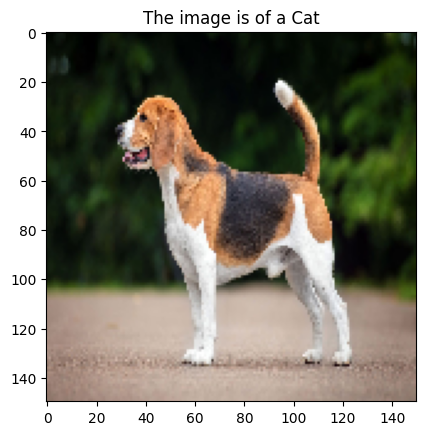

In [ ]:
image_pred('/content/beagle-hound-dog.jpg')

In [ ]:
!wget https://cdn.britannica.com/44/7144-004-967419E4/Manx-mackerel-tabby.jpg

--2023-10-24 09:10:34--  https://cdn.britannica.com/44/7144-004-967419E4/Manx-mackerel-tabby.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 52.84.18.123, 52.84.18.32, 52.84.18.97, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|52.84.18.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29517 (29K) [image/jpeg]
Saving to: ‘Manx-mackerel-tabby.jpg’

Manx-mackerel-tabby 100%[===================>]  28.83K  --.-KB/s    in 0.008s  

2023-10-24 09:10:34 (3.32 MB/s) - ‘Manx-mackerel-tabby.jpg’ saved [29517/29517]



1/1 [==============================] - 0s 19ms/step


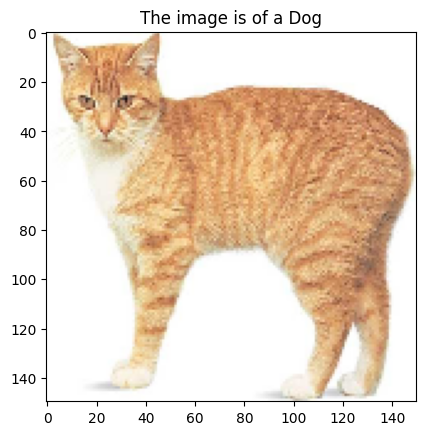

In [ ]:
image_pred('/content/Manx-mackerel-tabby.jpg')